In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%%capture
!wget https://www.dropbox.com/s/3uoupxpfvhtr7wg/Mall_Customers.csv

Чтение файла

In [3]:
df = pd.read_csv('Mall_Customers.csv')
del df['CustomerID']
del df['Gender']

Определение алгоритма

In [4]:
model = KMeans(n_clusters=6)
values = df.values
model.fit(values)
data = model.predict(values)

Кластеры по "годовому доходу от покупателя" и "способности потратьть деньги"

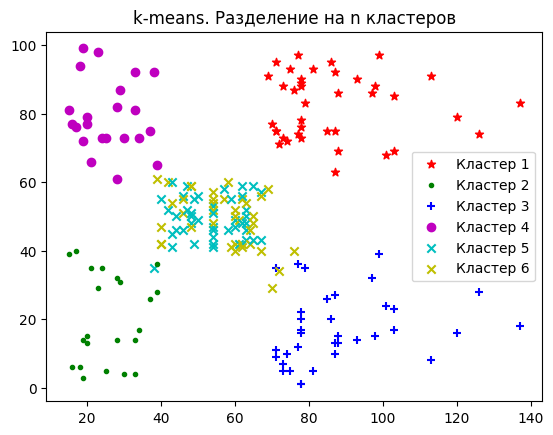

In [5]:
for i in range(0, len(values)):
  if data[i] == 0:
    c1 = plt.scatter(values[i, 1], values[i, 2], c='r', marker='*')
  elif data[i] == 1:
    c2 = plt.scatter(values[i, 1], values[i, 2], c='g', marker='.')
  elif data[i] == 2:
    c3 = plt.scatter(values[i, 1], values[i, 2], c='b', marker='+')
  elif data[i] == 3:
    c4 = plt.scatter(values[i, 1], values[i, 2], c='m', marker='o')
  elif data[i] == 4:
    c5 = plt.scatter(values[i, 1], values[i, 2], c='c', marker='x')
  elif data[i] == 5:
    c6 = plt.scatter(values[i, 1], values[i, 2], c='y', marker='x')
plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4'
, 'Кластер 5', 'Кластер 6'])
plt.title('k-means. Разделение на n кластеров')
plt.show()

Кластеры по "возрасту" и "способности потратьть деньги"

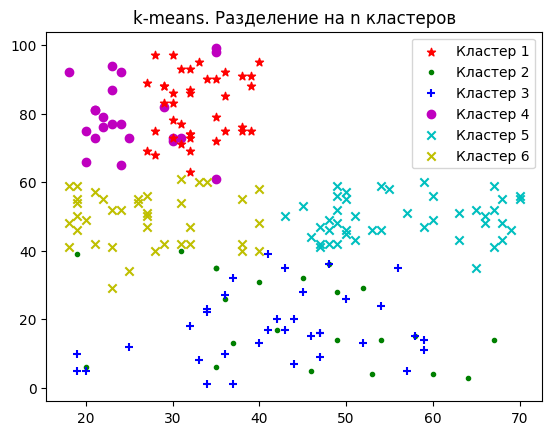

In [6]:
for i in range(0, len(values)):
  if data[i] == 0:
    c1 = plt.scatter(values[i, 0], values[i, 2], c='r', marker='*')
  elif data[i] == 1:
    c2 = plt.scatter(values[i,0], values[i, 2], c='g', marker='.')
  elif data[i] == 2:
    c3 = plt.scatter(values[i, 0], values[i, 2], c='b', marker='+')
  elif data[i] == 3:
    c4 = plt.scatter(values[i, 0], values[i, 2], c='m', marker='o')
  elif data[i] == 4:
    c5 = plt.scatter(values[i, 0], values[i, 2], c='c', marker='x')
  elif data[i] == 5:
    c6 = plt.scatter(values[i, 0], values[i, 2], c='y', marker='x')
plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4'
, 'Кластер 5', 'Кластер 6'])
plt.title('k-means. Разделение на n кластеров')
plt.show()

Кластеры по "возрасту" и "годовому доходу от покупателя

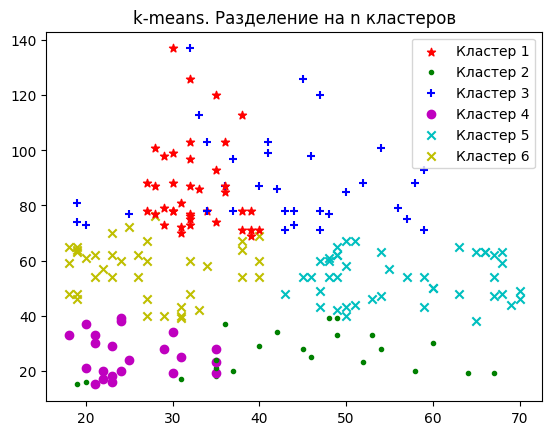

In [7]:
for i in range(0, len(values)):
  if data[i] == 0:
    c1 = plt.scatter(values[i, 0], values[i, 1], c='r', marker='*')
  elif data[i] == 1:
    c2 = plt.scatter(values[i,0], values[i, 1], c='g', marker='.')
  elif data[i] == 2:
    c3 = plt.scatter(values[i, 0], values[i, 1], c='b', marker='+')
  elif data[i] == 3:
    c4 = plt.scatter(values[i, 0], values[i, 1], c='m', marker='o')
  elif data[i] == 4:
    c5 = plt.scatter(values[i, 0], values[i, 1], c='c', marker='x')
  elif data[i] == 5:
    c6 = plt.scatter(values[i, 0], values[i, 1], c='y', marker='x')
plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4'
, 'Кластер 5', 'Кластер 6'])
plt.title('k-means. Разделение на n кластеров')
plt.show()

Форматирование данных

In [8]:
scores= []
res_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
  model = KMeans(n_clusters=i, random_state=0).fit(values)
  preds = model.predict(values)
  print("Score for number of cluster(s) {}: {}".format(i,model.score(values)))
  scores.append(-model.score(values))
  silhouette = silhouette_score(values,preds)
  res_silhouette.append(silhouette)

print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 2: -212840.16982097187
Score for number of cluster(s) 3: -143342.75157170597
Score for number of cluster(s) 4: -105251.10813220499
Score for number of cluster(s) 5: -82608.63809385584
Score for number of cluster(s) 6: -58338.70237980936
Score for number of cluster(s) 7: -52496.589488327176
Score for number of cluster(s) 8: -44342.3173934174
Score for number of cluster(s) 9: -40623.36547212478
Score for number of cluster(s) 10: -37153.67212762972
Score for number of cluster(s) 11: -35313.255086580095
Silhouette score for number of cluster(s) 11: 0.36076228212453215


Метод Локтя

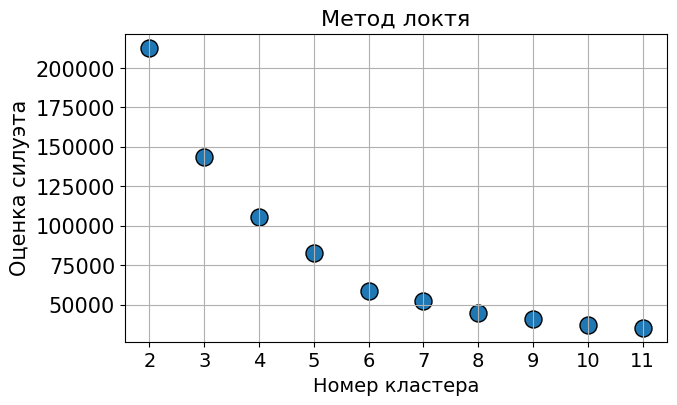

In [9]:
plt.figure(figsize=(7,4))
plt.title("Метод локтя",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Номер кластера",fontsize=14)
plt.ylabel("Оценка силуэта",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Метод Силуэта

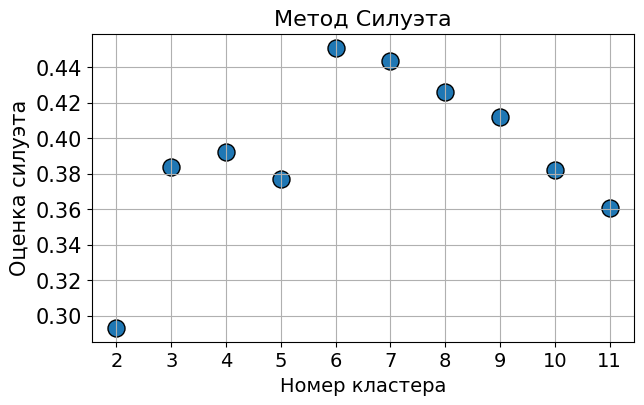

In [10]:
plt.figure(figsize=(7,4))
plt.title("Метод Силуэта",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=res_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Номер кластера",fontsize=14)
plt.ylabel("Оценка силуэта",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()